# Estadística descriptiva

## ¿Qué vamos a ver hoy?

### Estadística descriptiva

Son herramientas que sirven para describir un conjunto de valores mediante algunas características del conjunto.

Vamos a ver que es y como calcular:

Maneras de buscar un valor representativo

- Media
- Mediana
- Moda

Maneras de cuantificar cuanto varian los valores

- Rango
- Varianza
- Desviacion estandar
- Coeficiente de variacion

Maneras de ver si diferentes aspectos o variables se vinculan entre si.

- Covarianza
- Correlacion

No vamos a ver hoy estaditica inferencial, es decir tratar de predecir que puede pasar o que probabilidad hay que de que sucedan cosas a partir de los datos conocidos.

### Herramientas basicas de visualización

No es el objetivo de la clase de hoy (hay mas de una clase que vamos a dedicar exclusivamente a eso), pero para ayudarnos a visualizar la infomacion vamos a ver como generar:

- Graficos de lineas
- Graficos de puntos
- Histogramas

## Idea de la clase

- Arranacamos con una pequeña encuesta que vamos a usar de ejemplo durante la clase.
- Vamos repasando con la presentacion las ideas y vamos probando implementar las ideas en los datos de la encuesta.
- Despues del ejemplo en conjunto queda el hands-on para que practiquen en clase (esperemos llegar).

# La encuesta....

https://forms.gle/JgpooKWc2L9vg5pn9

# Repaso de como leer un archivo csv


In [33]:
import numpy as np

In [34]:
# Nota: En la version actual google drive genera un csv con comillas. Hubo que quitar todas las comillas con un editor de texto antes de poder leerlo aca porque numpy no tiene un parametro para procesar las comillas bien.

filename = "Formulario_C4_arreglado.csv"
data_cruda = np.genfromtxt(filename, delimiter=",", dtype=str) # Notar que si no ponemos el separador correcto tira error. Y si no ponemos dtype lee todo como vacio.
data_cruda

alturas = data_cruda[1:,1].astype(int) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (alturas)

pesos = data_cruda[1:,2].astype(int) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (pesos)

[134 173 176 156 172 154 190 165 176 178 176 190 155 172 190 178 177 156
 183 168 181 185 178 160 174 174 183 170 163 168 173 176 175 164 160 174
 168 170 168 163 165 158 150 171 178 162 171 172 190 173 185 160 175 175
 176 174 180 180 184 175 174 192 173 150 178 163 164 182 177 175 177 165
 165 170 180 162 177 156 169 182 152 175 194 175 175 180 178 172 185 175]
[ 92  94  76  45  98  65 108  48  76  95  76 120  56  65  83 132  80  75
  73  68  71  80  76  62  71  93  98  80  67  60  64  86  67  75  57  76
  68  77  69  70  55  47  51  75  76  50  80  81  80  66  78  57  68  80
  88  72 116  72  84  60  75  92  75  65  91  53  53  87  74  70  77  65
  65  75  75  64  74  51  46  68  45  72  88  80  65  81  85  60  62  86]


# Ver primer parte de la presentación

In [35]:
# Calculamos la media, la mediana y la moda para las columnas

print (f'El valor medio para las alturas del curso es: {np.mean(alturas)}')
print (f'El valor medio para los pesos del curso es: {np.mean(pesos)}')

print (f'La mediana para las alturas del curso es: {np.median(alturas)}')
print (f'La mediana para los pesos del curso es: {np.median(pesos)}')

# numpy no tiene un metodo para calcular la moda!!!!!

# Pero otra libreria como scipy si

from scipy import stats # No funciona import scipy y usar scipy.stats

print (f'La moda para las alturas del curso es: {stats.mode(alturas)}') # Vemos que no tiene mucho sentido!

El valor medio para las alturas del curso es: 172.13333333333333
El valor medio para los pesos del curso es: 73.85555555555555
La mediana para las alturas del curso es: 174.0
La mediana para los pesos del curso es: 74.5
La moda para las alturas del curso es: ModeResult(mode=array([175]), count=array([9]))


# Como visualizar esto... (vamos a usar lo básico de Seaborn)

<AxesSubplot:>

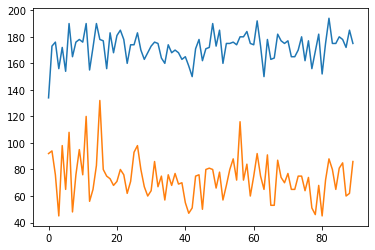

In [36]:
import seaborn as sns

# Hacer un grafico tipo "comun"

sns.lineplot(data = alturas)
sns.lineplot(data = pesos)


<AxesSubplot:>

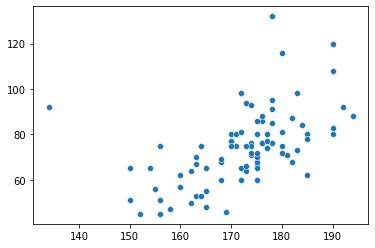

In [37]:
sns.scatterplot(x = alturas, y = pesos)

<AxesSubplot:ylabel='Count'>

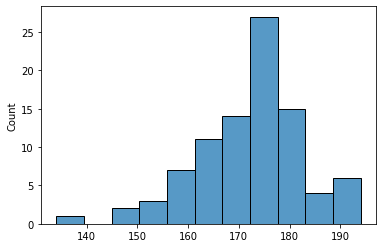

In [38]:
sns.histplot(alturas)

# Ideas de Dispersión

In [39]:
print (f'El rango de alturas va de: {np.max(alturas)}cm a {np.min(alturas)}cm, es decir que la alturas cubren un rango de {np.max(alturas)-np.min(alturas)}cm.' )

# Ahora queremos saber donde esta el 50% de las alturas mas comunes
# Numpy tiene una funcion que separa en partes ordenando

print (np.percentile(alturas, [75,25]))

print (f'El 50% de las alturas mas comunes estan entre: {np.percentile(alturas, [75 ,25])[1]}cm y {np.percentile(alturas, [75 ,25])[0]}cm.')

El rango de alturas va de: 194cm a 134cm, es decir que la alturas cubren un rango de 60cm.
[178. 165.]
El 50% de las alturas mas comunes estan entre: 165.0cm y 178.0cm.


In [40]:
# Como pedirle a numpy que nos calcule la varianza

print (f'La viarianza en las alturas es de: {np.var(alturas)}cm^2')
print (f'La desviacion estandar es de: {np.std(alturas)}cm')

La viarianza en las alturas es de: 108.71555555555555cm^2
La desviacion estandar es de: 10.426675191812372cm


In [41]:
# Vamos a calcular que porcentaje de los valores caen dentro de N desviaciones estandar de la media

n = 2
sd = np.std(alturas)
mean = np.mean(alturas)

mascara = (mean - n * sd < alturas) & (alturas < mean + n * sd)
#print (alturas[mascara])
#print (mascara.sum())
print (f'El porcenaje de valores que caen dentro del {n} desviaciones estandar es: {mascara.sum()/len(mascara)*100}%')


El porcenaje de valores que caen dentro del 2 desviaciones estandar es: 95.55555555555556%


In [42]:
# Comparando variabilidades entre dos variables

print (f'La desviacion estandar de las alturas es {np.std(alturas)}cm, y su valor medio es {np.mean(alturas)}cm. Su ceoficiente de variación es {np.std(alturas)/np.mean(alturas)}')
print (f'La desviacion estandar de los pesos es {np.std(pesos)}Kg, y su valor medio es {np.mean(pesos)}Kg. Su ceoficiente de variación es {np.std(pesos)/np.mean(pesos)}')

La desviacion estandar de las alturas es 10.426675191812372cm, y su valor medio es 172.13333333333333cm. Su ceoficiente de variación es 0.06057324859689604
La desviacion estandar de los pesos es 15.937768637290556Kg, y su valor medio es 73.85555555555555Kg. Su ceoficiente de variación es 0.2157964762082368


# Covarianza y correlación

In [43]:
# Repasemos los graficos pero ahora vamos a agregar las columnas genero y nombre
# como hay valores que faltan y estan en blanco los transformamos en 0 para que no haya errores de codigo.
sexo = data_cruda[1:,3]
print (sexo)
sexo[sexo==""] = "0"
sexo[sexo=="Varon"] = "-1"
sexo[sexo=="Mujer"] = "1"
sexo = sexo.astype(float)
print (sexo)

letras = data_cruda[1:,4]
letras[letras==""] = "0"
letras = letras.astype(float) # Seleccionamos la columna 1 desde la fila uno hasta el final
print (letras)


['' '' '' '' 'Varon' 'Mujer' 'Varon' 'Mujer' 'Varon' 'Varon' 'Mujer'
 'Varon' 'Mujer' 'Varon' 'Varon' 'Varon' 'Varon' 'Mujer' 'Varon' 'Varon'
 'Varon' 'Varon' 'Varon' 'Mujer' 'Varon' 'Varon' 'Varon' 'Varon' 'Mujer'
 'Mujer' 'Mujer' 'Varon' 'Varon' 'Mujer' 'Mujer' 'Varon' 'Varon' 'Varon'
 'Varon' 'Varon' 'Mujer' 'Mujer' 'Mujer' 'Varon' 'Varon' 'Mujer' 'Varon'
 'Varon' 'Varon' 'Mujer' 'Varon' 'Mujer' 'Varon' 'Varon' 'Varon' 'Varon'
 'Varon' 'Varon' 'Varon' 'Mujer' 'Varon' 'Varon' 'Varon' 'Mujer' 'Varon'
 'Mujer' 'Mujer' 'Varon' 'Varon' 'Varon' 'Varon' 'Mujer' 'Mujer' 'Varon'
 'Varon' 'Varon' 'Varon' 'Mujer' 'Mujer' 'Varon' 'Mujer' 'Varon' 'Varon'
 'Varon' 'Varon' 'Varon' 'Varon' 'Mujer' 'Varon' 'Varon']
[ 0.  0.  0.  0. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  

### Comparamos alturas con pesos

<AxesSubplot:>

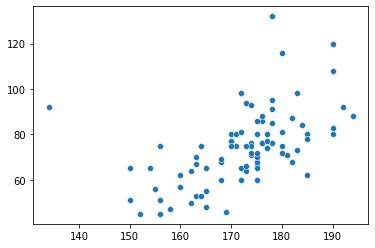

In [44]:
sns.scatterplot(x = alturas, y = pesos)

### Comparamos alturas con letras

<AxesSubplot:>

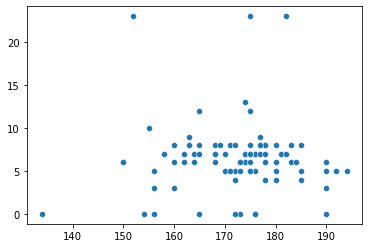

In [45]:
sns.scatterplot(x = alturas, y = letras)

### Comparamos altura con sexo (recordar que codificamos hombre como -1 y mujer como 1 y los datos desconocidos como 0)

<AxesSubplot:>

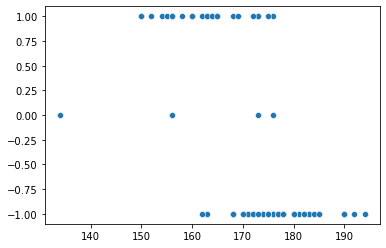

In [46]:
sns.scatterplot(x = alturas, y = sexo)

### Vamos a ver esto en forma de matriz

In [47]:
# Armamos la matriz con todos los datos

datos = [alturas,pesos,sexo,letras]
#print ("Matriz con los datos")
#print (datos)

#print (np.var(datos[0]))
#datos2 = np.transpose(datos)
print ("El orden de las columnas es: alturas, pesos, sexo, letras")
print ("Matriz de covarianza para los datos")
print (np.cov(datos,ddof=0))
print ("Matriz de correlacion para los datos")
print (np.corrcoef(datos))

print ("Vemos que la altura correlaciona con los pesos positivamente, con el sexo negativamente (mujer codifica como valor mas alto y hombre como mas bajo) y no correlaciona con el largo del nombre")

El orden de las columnas es: alturas, pesos, sexo, letras
Matriz de covarianza para los datos
[[ 1.08715556e+02  9.11081481e+01 -6.20814815e+00  4.41481481e-01]
 [ 9.11081481e+01  2.54012469e+02 -8.76246914e+00 -1.19023457e+01]
 [-6.20814815e+00 -8.76246914e+00  8.29135802e-01 -1.58765432e-01]
 [ 4.41481481e-01 -1.19023457e+01 -1.58765432e-01  1.62717284e+01]]
Matriz de correlacion para los datos
[[ 1.          0.54825658 -0.65388804  0.01049663]
 [ 0.54825658  1.         -0.60379032 -0.18513486]
 [-0.65388804 -0.60379032  1.         -0.04322413]
 [ 0.01049663 -0.18513486 -0.04322413  1.        ]]
Vemos que la altura correlaciona con los pesos positivamente, con el sexo negativamente (mujer codifica como valor mas alto y hombre como mas bajo) y no correlaciona con el largo del nombre


# Para mirar en las notebooks...

## metodos

- around: Redondea los valores con un numero de decimales que se le pasa como parametro
- argmax: Busca el indice donde está el maximo valor

## librerias

- matplotlib: Sirve para graficar como seaborn, la vamos a ver bien mas adelante.
